In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
covid_data = pd.read_csv('us-counties-covid19-20200504.csv')

In [3]:
USA_pop_county = pd.read_csv('USA_state_county_population_data_2010-2019.csv',encoding = "ISO-8859-1")

In [4]:
USA_pop_county = USA_pop_county[['STNAME', 'CTYNAME', 'POPESTIMATE2019']]
USA_pop_county.columns = ['State', 'County', '2019EstPop']
USA_pop_county['State_County'] = USA_pop_county['State'] + "_" + USA_pop_county['County']
USA_pop_county.head()

,State,County,2019EstPop,State_County
0,Alabama,Alabama,4903185,Alabama_Alabama
1,Alabama,Autauga County,55869,Alabama_Autauga County
2,Alabama,Baldwin County,223234,Alabama_Baldwin County
3,Alabama,Barbour County,24686,Alabama_Barbour County
4,Alabama,Bibb County,22394,Alabama_Bibb County


In [5]:
covid_data['county'] = covid_data['county'] + ' County'
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [6]:
covid_data.sort_values(by=['state', 'county'], inplace = True)

In [7]:
covid_data.head()

,date,county,state,fips,cases,deaths,State_County
9481,2020-03-24,Autauga County,Alabama,1001.0,1,0,Alabama_Autauga County
10839,2020-03-25,Autauga County,Alabama,1001.0,4,0,Alabama_Autauga County
12377,2020-03-26,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County
14046,2020-03-27,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County
15836,2020-03-28,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County


In [8]:
covid_data.reset_index(drop=True, inplace = True)

In [9]:
# manually change 'Allen County' in Louisiana to 'Allen Parish' BECAUSE there are also 'Allen County' in other states
covid_data.iloc[list(covid_data[covid_data['county'] == 'Allen County'][covid_data['state'] == 'Louisiana'].index),1] = 'Allen Parish'

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
# manually change 'Orleans County' in Louisiana to 'Orleans Parish' BECAUSE there are also 'Orleans County' in other states; similar for other counties
covid_data.iloc[list(covid_data[covid_data['county'] == 'Orleans County'][covid_data['state'] == 'Louisiana'].index),1] = 'Orleans Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Jefferson County'][covid_data['state'] == 'Louisiana'].index),1] = 'Jefferson Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Lafayette County'][covid_data['state'] == 'Louisiana'].index),1] = 'Lafayette Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Caddo County'][covid_data['state'] == 'Louisiana'].index),1] = 'Caddo Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'St. Charles County'][covid_data['state'] == 'Louisiana'].index),1] = 'St. Charles Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Ouachita County'][covid_data['state'] == 'Louisiana'].index),1] = 'Ouachita Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'District of Columbia County'][covid_data['state'] == 'District of Columbia'].index),1] = 'District of Columbia'
covid_data.iloc[list(covid_data[covid_data['county'] == 'New York City County'].index),1] = 'New York City'

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

In [11]:
# note the left join when merging COVID-19 dataset with US population dataset
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [12]:
covid_data[covid_data['date'] == covid_data.date.max()][covid_data['state'] == 'Illinois'].head(20)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,county,state,fips,cases,deaths,State_County,State,County,2019EstPop
24593,2020-05-04,Adams County,Illinois,17001.0,40,1,Illinois_Adams County,Illinois,Adams County,65435.0
24612,2020-05-04,Alexander County,Illinois,17003.0,4,0,Illinois_Alexander County,Illinois,Alexander County,5761.0
24649,2020-05-04,Bond County,Illinois,17005.0,6,1,Illinois_Bond County,Illinois,Bond County,16426.0
24679,2020-05-04,Boone County,Illinois,17007.0,144,11,Illinois_Boone County,Illinois,Boone County,53544.0
24683,2020-05-04,Brown County,Illinois,17009.0,2,0,Illinois_Brown County,Illinois,Brown County,6578.0
24722,2020-05-04,Bureau County,Illinois,17011.0,12,0,Illinois_Bureau County,Illinois,Bureau County,32628.0
24752,2020-05-04,Calhoun County,Illinois,17013.0,1,0,Illinois_Calhoun County,Illinois,Calhoun County,4739.0
24790,2020-05-04,Carroll County,Illinois,17015.0,10,2,Illinois_Carroll County,Illinois,Carroll County,14305.0
24805,2020-05-04,Cass County,Illinois,17017.0,40,0,Illinois_Cass County,Illinois,Cass County,12147.0
24849,2020-05-04,Champaign County,Illinois,17019.0,182,6,Illinois_Champaign County,Illinois,Champaign County,209689.0


In [13]:
covid_data.drop(columns = ['State', 'County', 'fips'], inplace = True)

#### List of County Names to be Re-Named (to be properly joined with USA population file)

In [14]:
county_list1 = ['Acadia County', 
                'Alexandria city County', 
                'Anchorage County', 
                'Ascension County', 
                'Assumption County',
                'Avoyelles County', 
                'Fairbanks North Star Borough County', 
                'Juneau City and Borough County',
                'St. Tammany County', 
                'East Baton Rouge County', 
                'Baltimore city County', 
                'St. Louis city County',
                'St. John the Baptist County',
                'District of Columbia County',
                'Kansas City County',
                'St. Bernard County',
                'Lafourche County',
                'Virginia Beach city County',
                'St. James County',
                'Bossier County']
county_list2 = ['Acadia Parish',
                'Alexandria city',
                'Anchorage Municipality',
                'Ascension Parish',
                'Assumption Parish',
                'Avoyelles Parish',
                'Fairbanks North Star Borough',
                'Juneau City and Borough',
                'St. Tammany Parish',
                'East Baton Rouge Parish',
                'Baltimore city',
                'St. Louis city',
                'St. John the Baptist Parish',
                'District of Columbia',
                'Kansas City',
                'St. Bernard Parish',
                'Lafourche Parish',
                'Virginia Beach city', 
                'St. James Parish',
                'Bossier Parish']

In [15]:
covid_data.replace(to_replace = county_list1, value = county_list2, inplace = True)

In [16]:
covid_data.drop(columns = 'State_County', inplace = True)

In [17]:
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [18]:
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [19]:
covid_data.drop(columns = ['State', 'County', '2019EstPop_x'], inplace = True)

In [20]:
covid_data.rename(columns={'2019EstPop_y':'2019EstPop'}, inplace = True)

In [21]:
covid_data.head()

,date,county,state,cases,deaths,State_County,2019EstPop
0,2020-03-24,Autauga County,Alabama,1,0,Alabama_Autauga County,55869.0
1,2020-03-25,Autauga County,Alabama,4,0,Alabama_Autauga County,55869.0
2,2020-03-26,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0
3,2020-03-27,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0
4,2020-03-28,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0


In [22]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [23]:
covid_data.dtypes

date            datetime64[ns]
county                  object
state                   object
cases                    int64
deaths                   int64
State_County            object
2019EstPop             float64
dtype: object

In [24]:
covid_data_US = covid_data.groupby('date')['cases', 'deaths'].sum()
covid_data_US = covid_data_US[covid_data_US.index > '2020-03-02']

In [25]:
covid_data['CasesPer100000'] = covid_data['cases'] / (covid_data['2019EstPop'] / 100000)
covid_data['DeathsPer100000'] = covid_data['deaths'] / (covid_data['2019EstPop'] / 100000)

In [26]:
states = ['Illinois', 'Michigan', 'New York', 'Washington', 'California', 'Louisiana', 'Florida']
date_recent = '2020-03-10'

In [27]:
covid_st = covid_data[covid_data.state.isin(states)]

In [28]:
states = list(set(covid_data['state']))
states.sort()

In [29]:
covid_st.loc[:,'date'] = pd.to_datetime(covid_st.loc[:,'date'])

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
covid_st = covid_st[covid_st['date'] > date_recent]

In [31]:
covid_st_IL = covid_st[covid_st['state'] == 'Illinois']
covid_st_MI = covid_st[covid_st['state'] == 'Michigan']

In [32]:
covid_st_IL_summ = covid_st_IL.groupby('date')['cases','deaths'].sum()
covid_st_MI_summ = covid_st_MI.groupby('date')['cases','deaths'].sum()

In [33]:
covid_st_IL_summ.tail()

,cases,deaths
date,,
2020-04-30,52918,2361
2020-05-01,56055,2464
2020-05-02,58505,2576
2020-05-03,61499,2632
2020-05-04,63840,2673


In [35]:
65962 - 63840

2122

In [36]:
covid_st_IL_summ

,cases,deaths
date,,
2020-03-11,25,0
2020-03-12,32,0
2020-03-13,46,0
2020-03-14,66,0
2020-03-15,94,0
2020-03-16,104,0
2020-03-17,159,1
2020-03-18,286,1
2020-03-19,420,4


In [37]:
covid_IL_daily = covid_st_IL_summ.diff()
covid_IL_daily.columns = ['newcases_daily', 'newdeaths_daily']

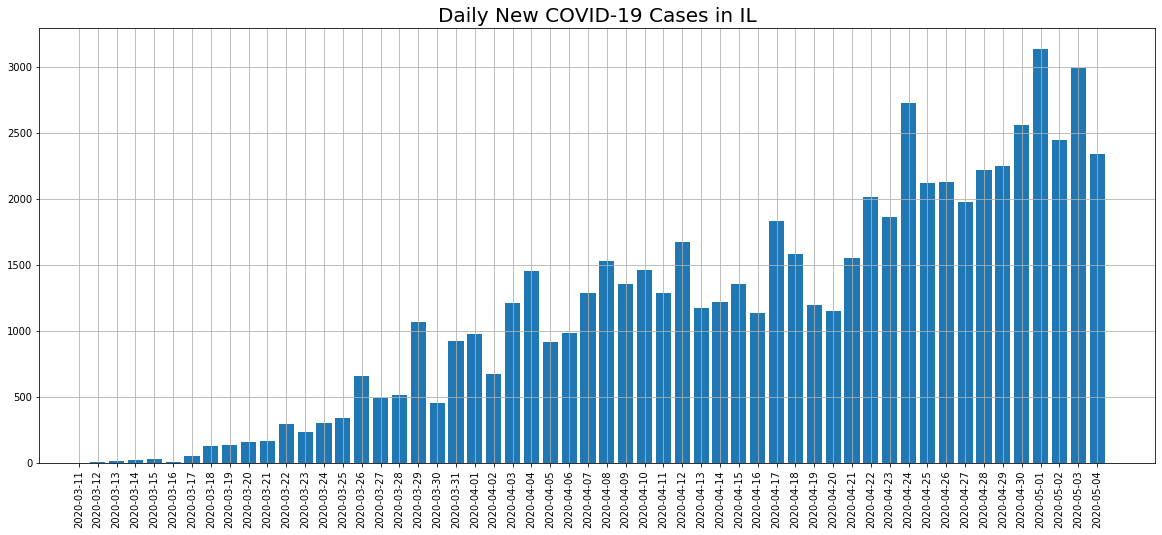

In [40]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in IL', fontsize = '20')
plt.bar(covid_IL_daily.index, covid_IL_daily.newcases_daily)

# y_ticks = np.linspace(0,3200,9)
plt.xticks(covid_IL_daily.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [41]:
covid_st_IL_summ_pct = covid_st_IL_summ.pct_change()
covid_st_IL_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

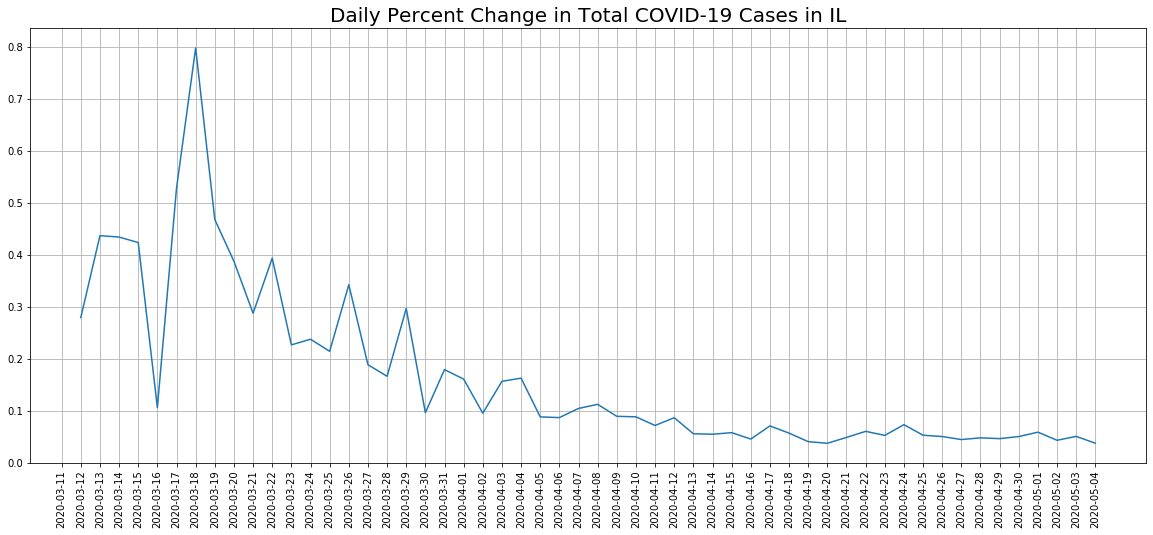

In [43]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in IL', fontsize = '20')
plt.plot(covid_st_IL_summ_pct.index, covid_st_IL_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_st_IL_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [44]:
# Cook County passed 100+ cases on 2020-03-17, look at data past that date
covid_data_IL_Cook = covid_data[covid_data['State_County'] == 
           'Illinois_Cook County'][covid_data['date'] > '2020-03-16'][['date', 'cases', 'deaths']]
covid_data_IL_Cook.set_index('date', inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
covid_data_IL_Cook.tail()

,cases,deaths
date,,
2020-04-30,36513,1607
2020-05-01,38668,1673
2020-05-02,40227,1743
2020-05-03,42324,1786
2020-05-04,43715,1802


In [48]:
26606 + 18617    # number of cases as of 2020-05-04 per http://www.dph.illinois.gov/covid19/covid19-statistics

45223

In [49]:
45223 - 43715    # number of daily new cases on 2020-05-04

1508

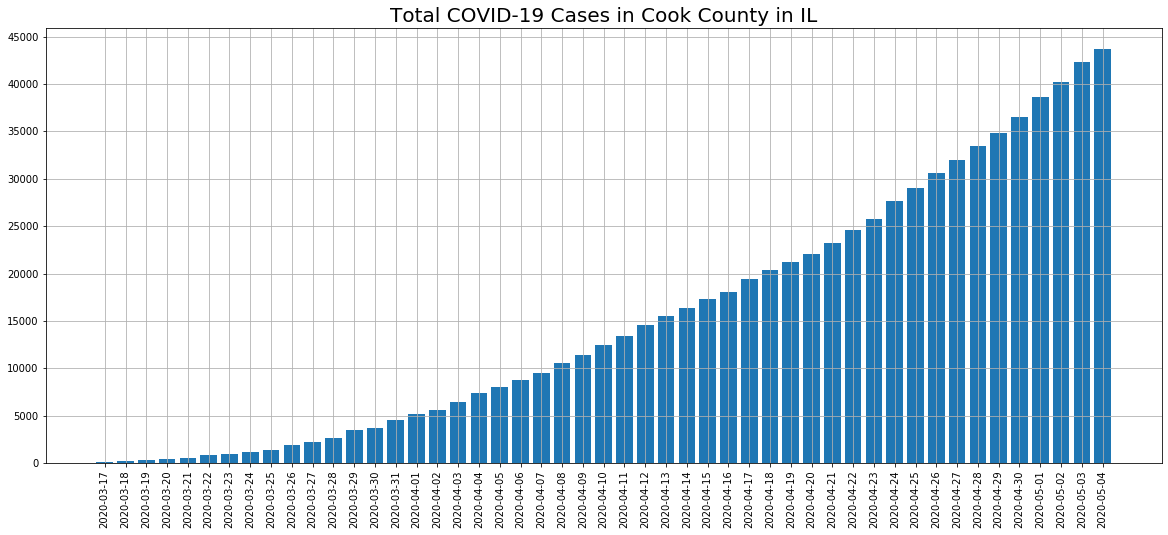

In [52]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.cases)

y_ticks = np.linspace(0,45000,10)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks)

plt.savefig('Total_COVID19_Cases_CookCounty_IL');

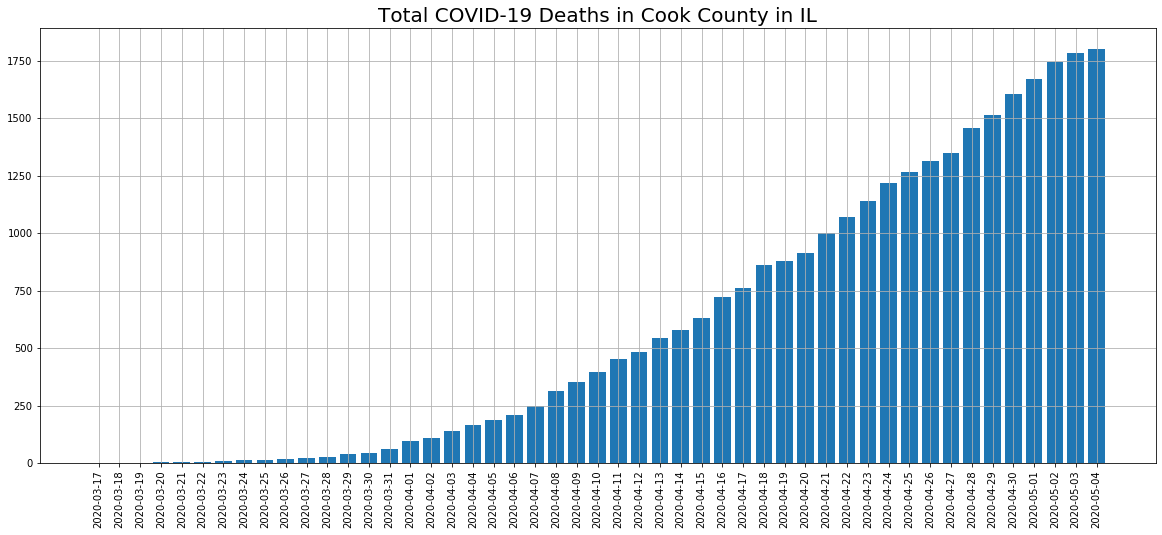

In [54]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.deaths)

# y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

# plt.savefig('Total_COVID19_Deaths_CookCounty_IL');

In [55]:
covid_data_IL_Cook_daily = covid_data_IL_Cook.diff()
covid_data_IL_Cook_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [56]:
covid_data_IL_Cook_daily.reset_index(inplace=True)

In [57]:
covid_data_IL_Cook_daily.tail()

,date,newcases_daily,newdeaths_daily
44,2020-04-30,1633.0,91.0
45,2020-05-01,2155.0,66.0
46,2020-05-02,1559.0,70.0
47,2020-05-03,2097.0,43.0
48,2020-05-04,1391.0,16.0


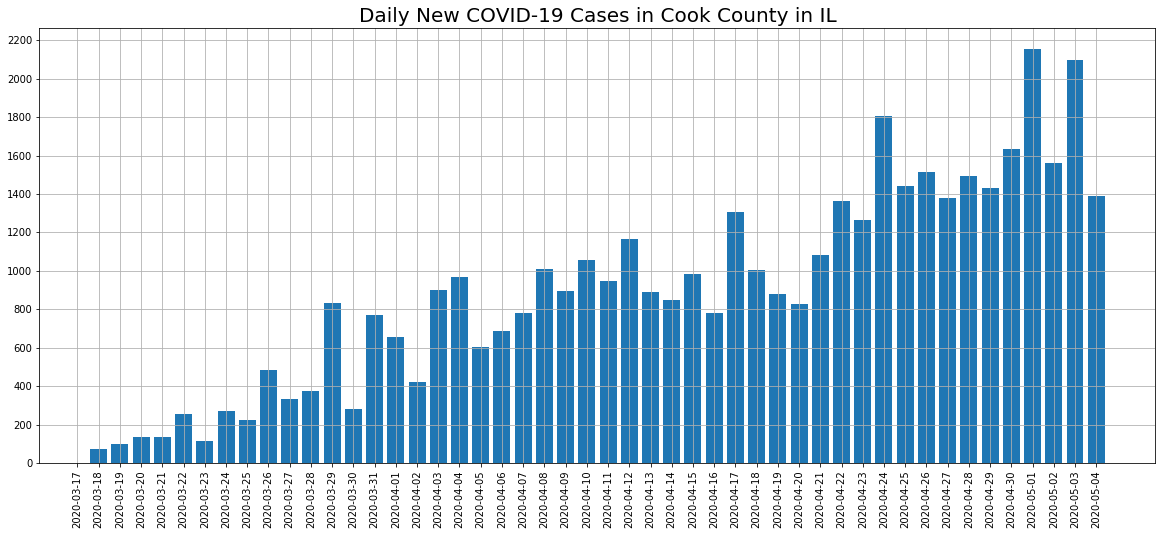

In [61]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily.newcases_daily)

y_ticks = np.linspace(0,2200,12)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

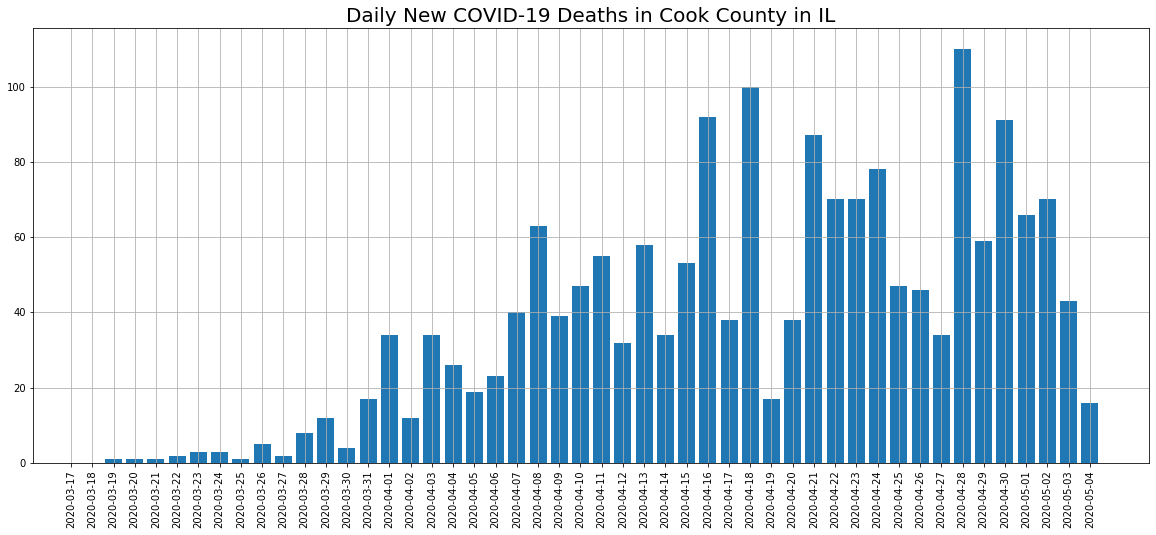

In [62]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily.newdeaths_daily)

# y_ticks = np.linspace(0,100,11)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [63]:
# num_avg is the number of days for average_dailynewcases
num_avg = 3

In [64]:
covid_data_IL_Cook_daily[str(num_avg) + 'davg_dailynewcases'] = np.nan

In [65]:
# for loop to create/populate new column '#davg_dailynewcases'
for i in range(0,len(covid_data_IL_Cook_daily)):
    if i <= (num_avg - 1):
        covid_data_IL_Cook_daily.iloc[i,num_avg] = np.nan
    else:
        list1 = []
        for j in range(num_avg-1, -1, -1):
            list1.append(covid_data_IL_Cook_daily.iloc[i-j,1])
            covid_data_IL_Cook_daily.iloc[i,3] = sum(list1) / num_avg

In [66]:
# covid_data_IL_Cook_daily.drop(columns=['5davg_dailynewcases'],inplace=True)

In [67]:
covid_data_IL_Cook_daily

,date,newcases_daily,newdeaths_daily,3davg_dailynewcases
0,2020-03-17,NaN,NaN,NaN
1,2020-03-18,72.0,0.0,NaN
2,2020-03-19,100.0,1.0,NaN
3,2020-03-20,133.0,1.0,101.666667
4,2020-03-21,136.0,1.0,123.000000
5,2020-03-22,257.0,2.0,175.333333
6,2020-03-23,117.0,3.0,170.000000
7,2020-03-24,272.0,3.0,215.333333
8,2020-03-25,224.0,1.0,204.333333
9,2020-03-26,486.0,5.0,327.333333


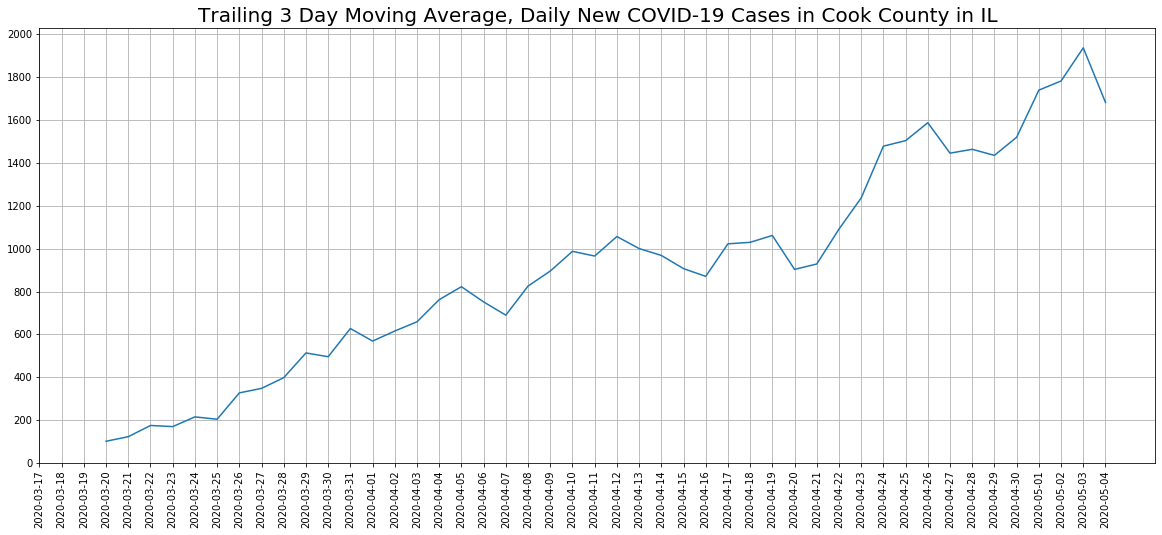

In [68]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Trailing 3 Day Moving Average, Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily['3davg_dailynewcases'])

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [69]:
covid_data_IL_Cook_pct = covid_data_IL_Cook.pct_change()
covid_data_IL_Cook_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

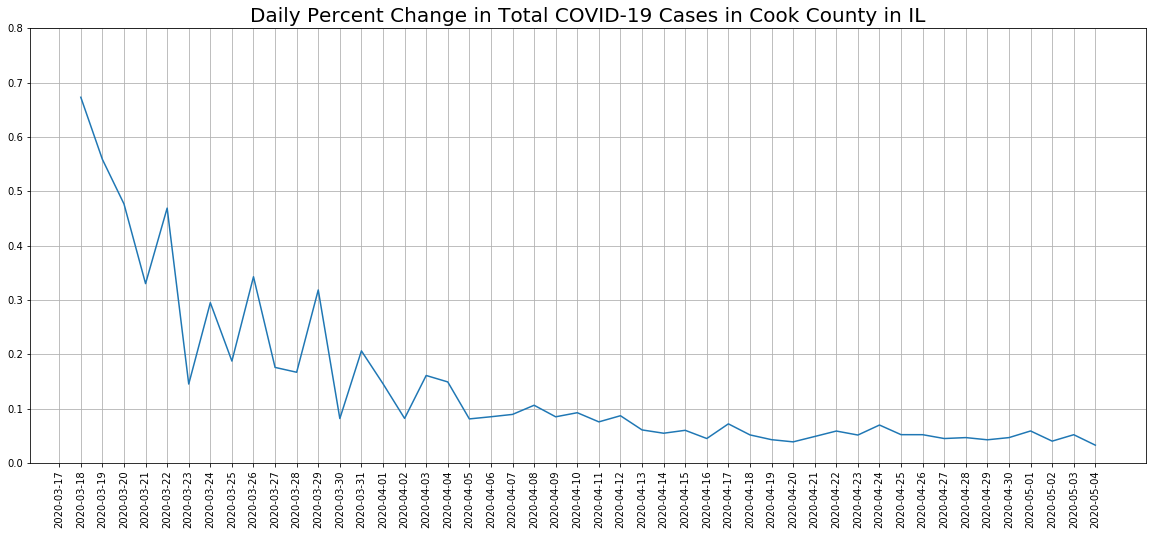

In [70]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_pct.index, covid_data_IL_Cook_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_data_IL_Cook_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [71]:
covid_MI_OAK = covid_st_MI[covid_st_MI['county'] == 'Oakland County'].groupby('date')['cases','deaths'].sum()

In [72]:
covid_MI_OAK.tail()

,cases,deaths
date,,
2020-04-30,7267,696
2020-05-01,7423,705
2020-05-02,7475,745
2020-05-03,7518,757
2020-05-04,7499,762


In [75]:
7522 - 7499       # calculate daily new cases for Oakland County, MI for 2020-05-04

23

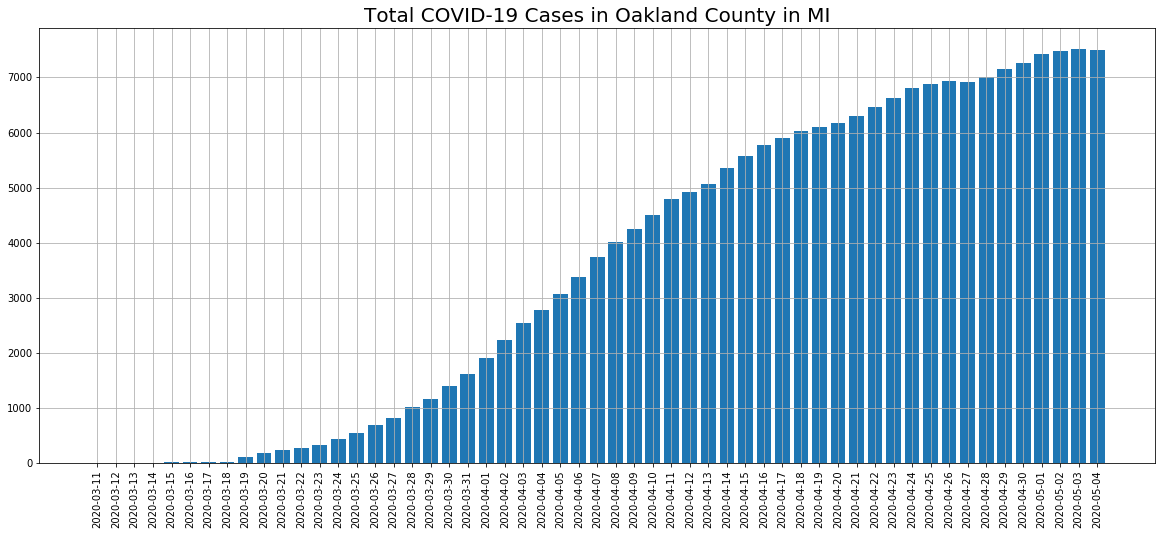

In [76]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.cases)

# y_ticks = np.linspace(0,7500,16)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

plt.savefig('Total_COVID19_Cases_OaklandCounty_MI');

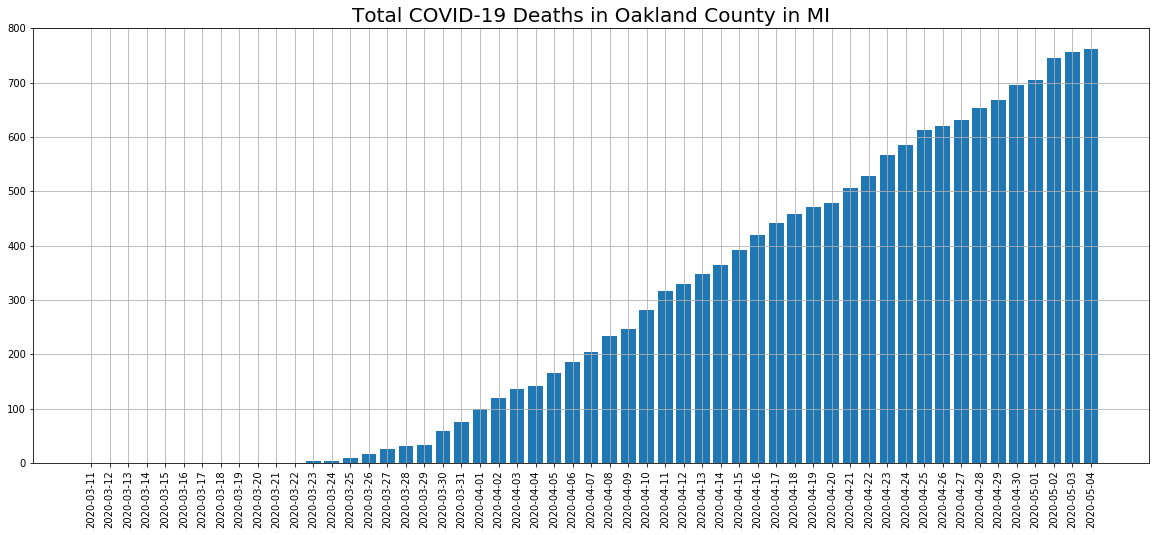

In [77]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.deaths)

# y_ticks = np.linspace(0,7500,16)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

# plt.savefig('Total_COVID19_Deaths_OaklandCounty_MI');

In [78]:
covid_MI_OAK_daily = covid_MI_OAK.diff()
covid_MI_OAK_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [79]:
covid_MI_OAK_daily.tail()

,newcases_daily,newdeaths_daily
date,,
2020-04-30,108.0,28.0
2020-05-01,156.0,9.0
2020-05-02,52.0,40.0
2020-05-03,43.0,12.0
2020-05-04,-19.0,5.0


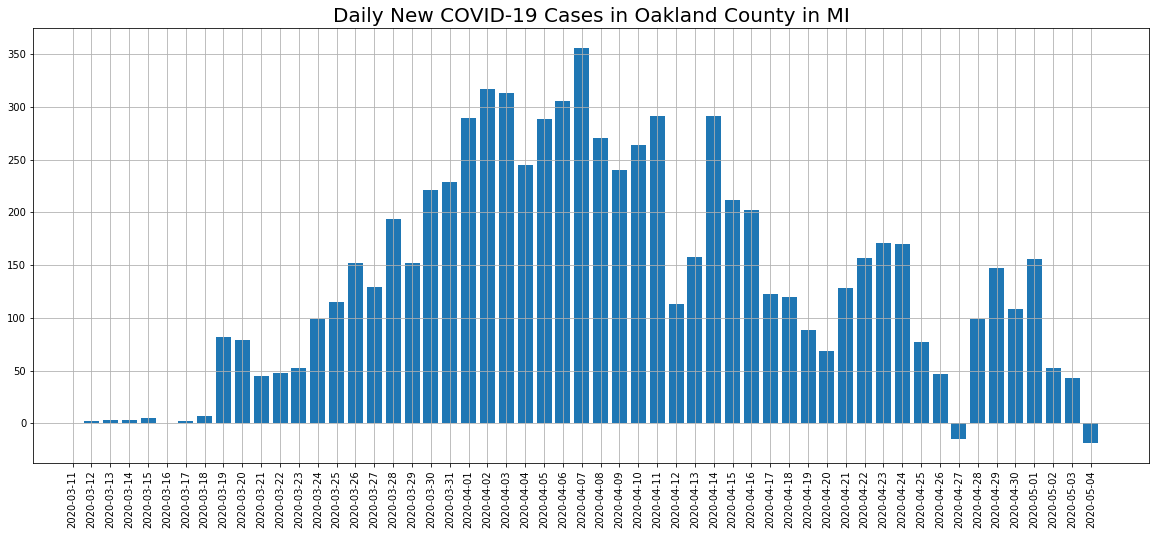

In [80]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newcases_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

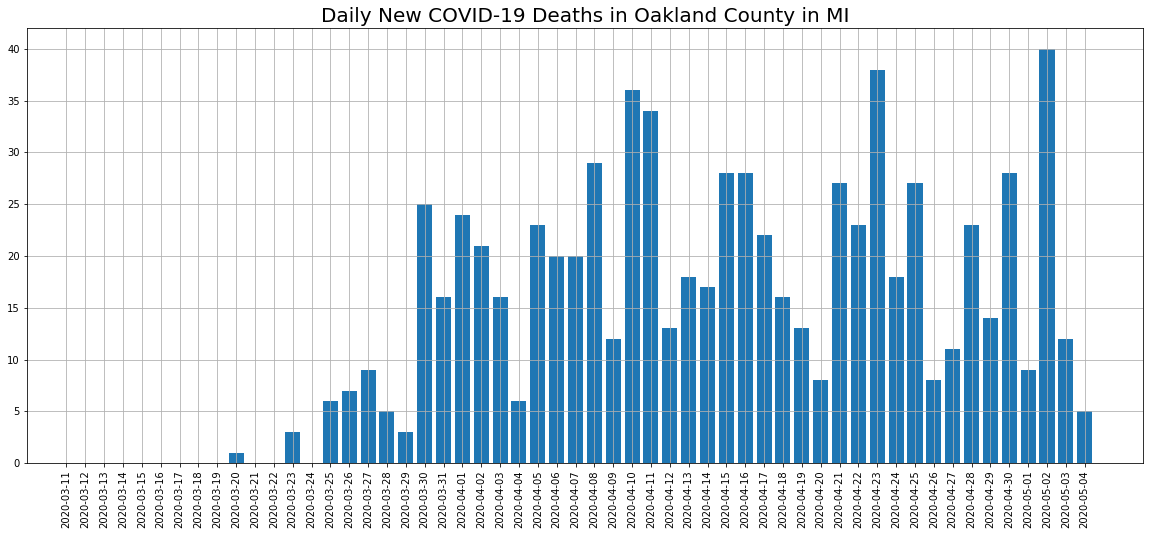

In [81]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newdeaths_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

In [85]:
# there was a large spike on 3/19/2020 so look at the daily % change after that date
covid_MI_OAK_pct = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19'].pct_change()
covid_MI_OAK_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

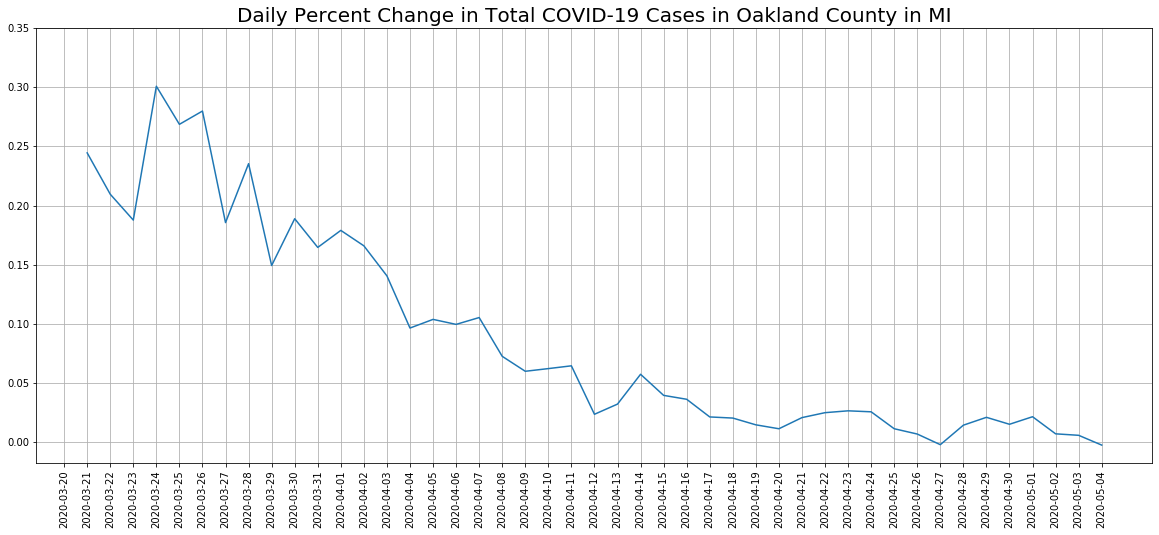

In [86]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_pct.index, covid_MI_OAK_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.35,8)
plt.xticks(covid_MI_OAK_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [88]:
# 10 deaths on 2020-03-25, look at data after that date
covid_MI_OAK_cum = covid_MI_OAK[covid_MI_OAK.index > '2020-03-24']
covid_MI_OAK_cum

,cases,deaths
date,,
2020-03-25,543,10
2020-03-26,695,17
2020-03-27,824,26
2020-03-28,1018,31
2020-03-29,1170,34
2020-03-30,1391,59
2020-03-31,1620,75
2020-04-01,1910,99
2020-04-02,2227,120


In [89]:
cases_day0 = covid_MI_OAK_cum.iloc[0,0]
deaths_day0 = covid_MI_OAK_cum.iloc[0,1]
print(cases_day0)
print(deaths_day0)

543
10


In [90]:
covid_MI_OAK_cum['cum_pctchange_cases'] = covid_MI_OAK_cum['cases'] / cases_day0
covid_MI_OAK_cum['cum_pctchange_deaths'] = covid_MI_OAK_cum['deaths'] / deaths_day0

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
covid_MI_OAK_pct

,cases_dailypctchange,deaths_dailypctchange
date,,
2020-03-20,NaN,NaN
2020-03-21,0.244565,0.000000
2020-03-22,0.209607,0.000000
2020-03-23,0.187726,3.000000
2020-03-24,0.300912,0.000000
2020-03-25,0.268692,1.500000
2020-03-26,0.279926,0.700000
2020-03-27,0.185612,0.529412
2020-03-28,0.235437,0.192308


In [92]:
covid_MI_OAK_cum['daily_pctchange_cases'] = [covid_MI_OAK_pct.loc[i, 'cases_dailypctchange'] for i in list(covid_MI_OAK_cum.index)]
covid_MI_OAK_cum['daily_pctchange_deaths'] = [covid_MI_OAK_pct.loc[i, 'deaths_dailypctchange'] for i in list(covid_MI_OAK_cum.index)]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
covid_MI_OAK_cum

,cases,deaths,cum_pctchange_cases,cum_pctchange_deaths,daily_pctchange_cases,daily_pctchange_deaths
date,,,,,,
2020-03-25,543,10,1.000000,1.0,0.268692,1.500000
2020-03-26,695,17,1.279926,1.7,0.279926,0.700000
2020-03-27,824,26,1.517495,2.6,0.185612,0.529412
2020-03-28,1018,31,1.874770,3.1,0.235437,0.192308
2020-03-29,1170,34,2.154696,3.4,0.149312,0.096774
2020-03-30,1391,59,2.561694,5.9,0.188889,0.735294
2020-03-31,1620,75,2.983425,7.5,0.164630,0.271186
2020-04-01,1910,99,3.517495,9.9,0.179012,0.320000
2020-04-02,2227,120,4.101289,12.0,0.165969,0.212121


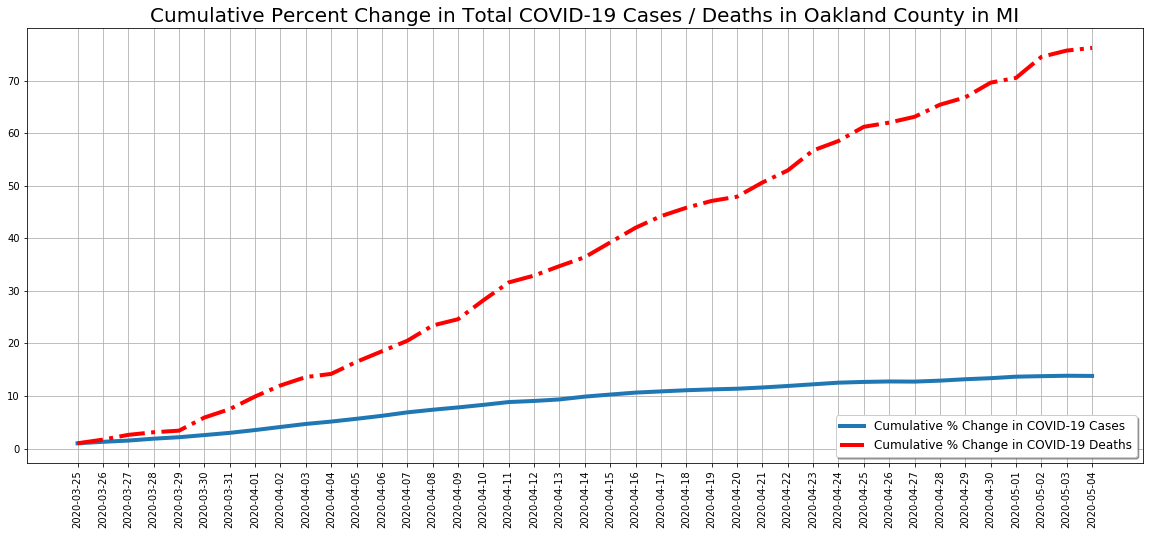

In [94]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Cumulative Percent Change in Total COVID-19 Cases / Deaths in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_cum.index, covid_MI_OAK_cum.cum_pctchange_cases, linewidth = 4, linestyle = '-')
plt.plot(covid_MI_OAK_cum.index, covid_MI_OAK_cum.cum_pctchange_deaths, linewidth = 4, color = 'r', linestyle = '-.')

plt.xticks(covid_MI_OAK_cum.index, fontsize = '10', rotation = 90)
plt.legend(['Cumulative % Change in COVID-19 Cases','Cumulative % Change in COVID-19 Deaths'], 
           shadow = True, loc = 4, fontsize = '12');

In [98]:
covid_MI_OAK['death_rate'] = covid_MI_OAK['deaths'] / covid_MI_OAK['cases']

In [99]:
covid_MI_OAK_deathrate = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19']
covid_MI_OAK_deathrate.tail()

,cases,deaths,death_rate
date,,,
2020-04-30,7267,696,0.095775
2020-05-01,7423,705,0.094975
2020-05-02,7475,745,0.099666
2020-05-03,7518,757,0.100692
2020-05-04,7499,762,0.101614


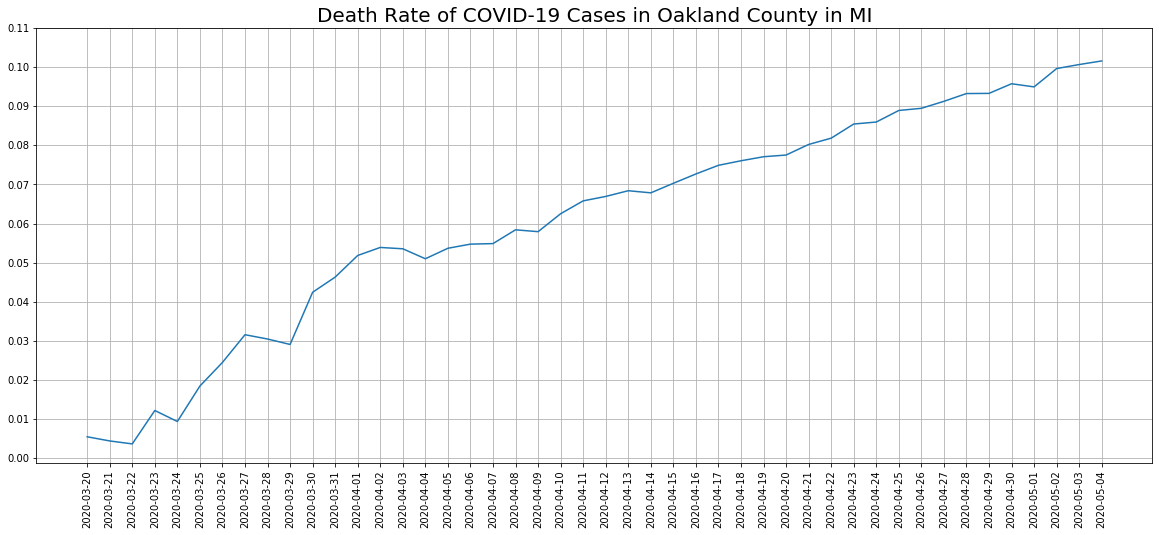

In [101]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_deathrate.index, covid_MI_OAK_deathrate.death_rate)

ticks_y = np.linspace(0,0.11,12)
plt.xticks(covid_MI_OAK_deathrate.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [104]:
covid_MI_Wayne = covid_st_MI[covid_st_MI['county'] == 'Wayne County'][['date', 'cases', 'deaths']]
covid_MI_Wayne.set_index('date', inplace=True)

In [105]:
covid_MI_Wayne.tail()

,cases,deaths
date,,
2020-04-30,16729,1782
2020-05-01,16970,1802
2020-05-02,17106,1884
2020-05-03,17298,1893
2020-05-04,17314,1924


In [106]:
9424 + 7967     # Detroit City + Wayne County cases as of 2020-05-04 per https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html

17391

In [107]:
17391 - 17314    # calculate daily new cases on 2020-05-04

77

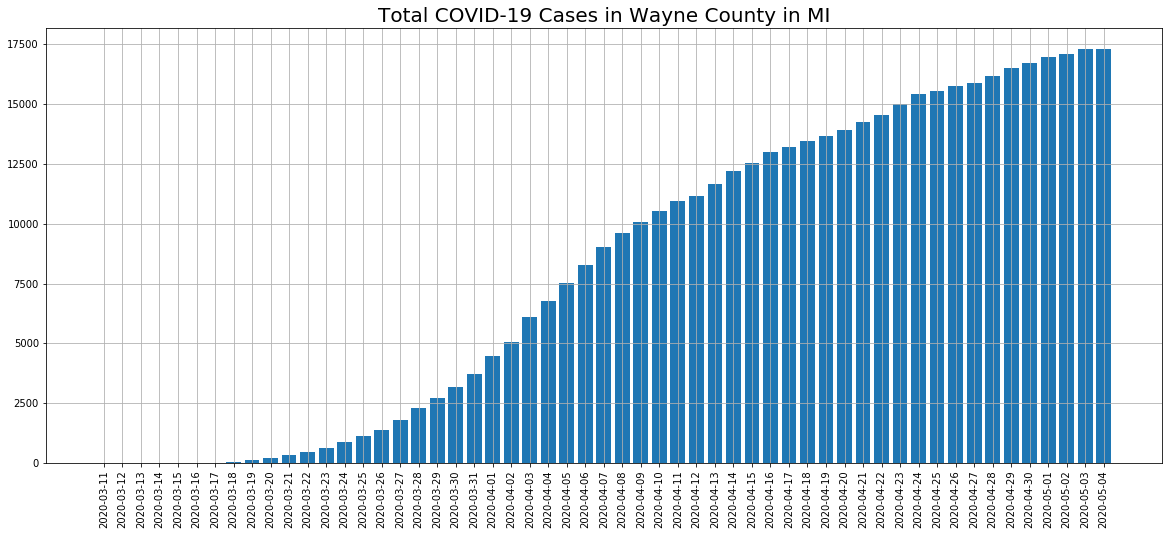

In [108]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.cases)

# y_ticks = np.linspace(0,16000,9)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)

plt.savefig('Total_COVID19_Cases_WayneCounty_MI');
# plt.yticks(y_ticks);

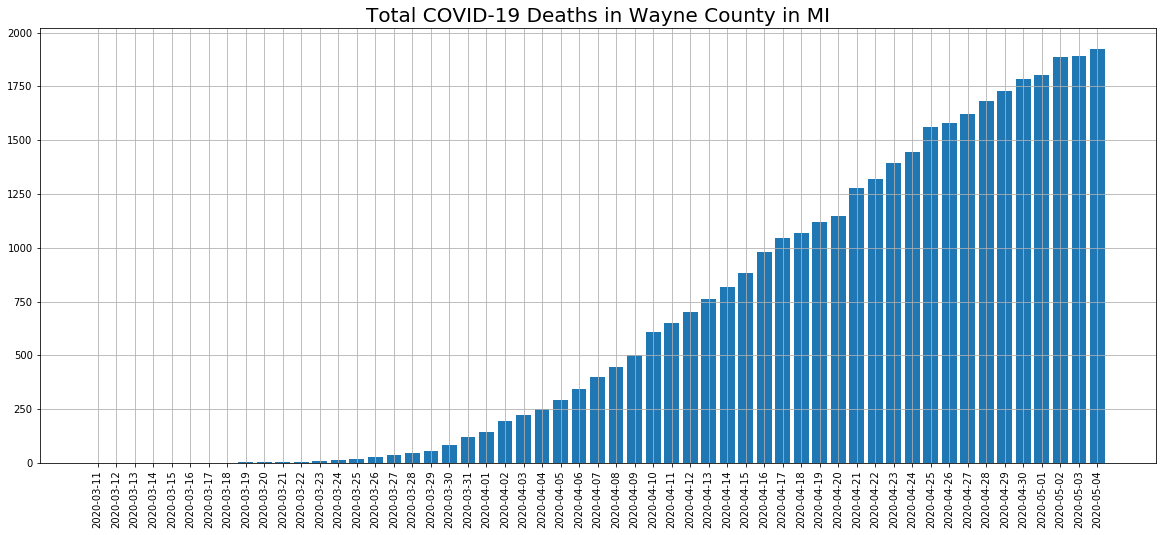

In [110]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.deaths)

# y_ticks = np.linspace(0,16000,9)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90);

# plt.savefig('Total_COVID19_Cases_WayneCounty_MI');
# plt.yticks(y_ticks);

In [111]:
covid_MI_Wayne_daily = covid_MI_Wayne.diff()
covid_MI_Wayne_daily.columns = ['newcases_daily', 'newdeaths_daily']

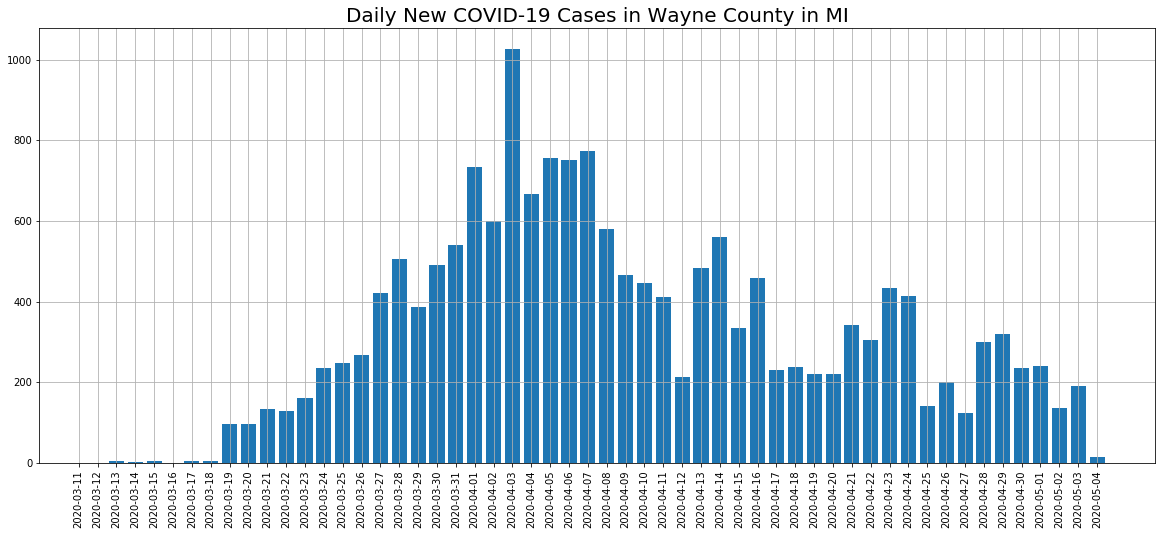

In [112]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newcases_daily)

plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90);

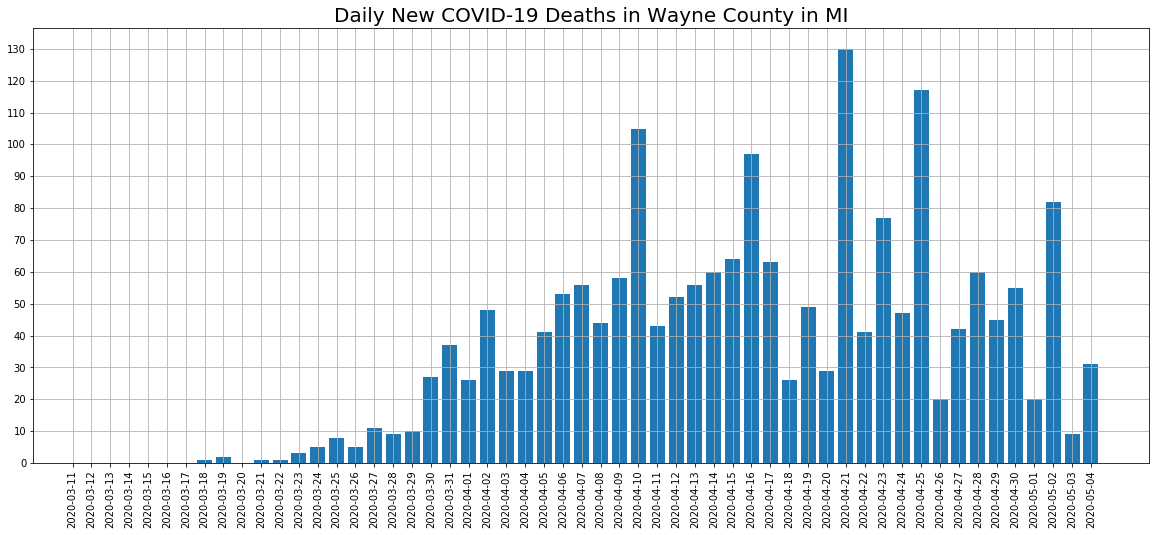

In [113]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newdeaths_daily)

y_ticks = np.linspace(0,130,14)
plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [114]:
# large spike on 2020-03-19 so look at data after that date
covid_MI_Wayne_pct = covid_MI_Wayne[covid_MI_Wayne.index > '2020-03-19'].pct_change()
covid_MI_Wayne_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

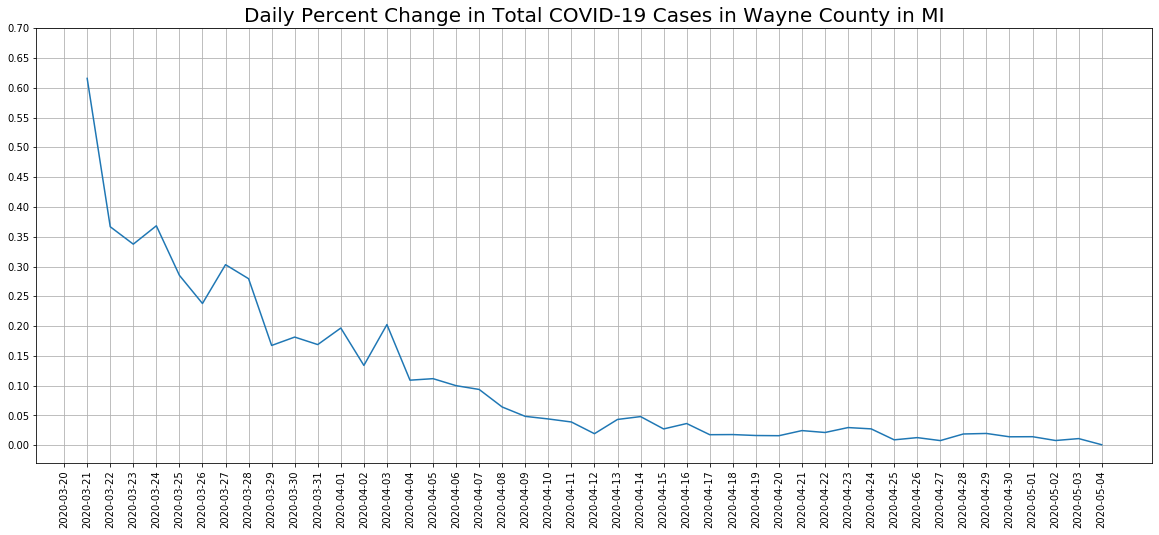

In [115]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne_pct.index, covid_MI_Wayne_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.7,15)
plt.xticks(covid_MI_Wayne_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [116]:
covid_MI_Wayne['death_rate'] = covid_MI_Wayne['deaths'] / covid_MI_Wayne['cases']

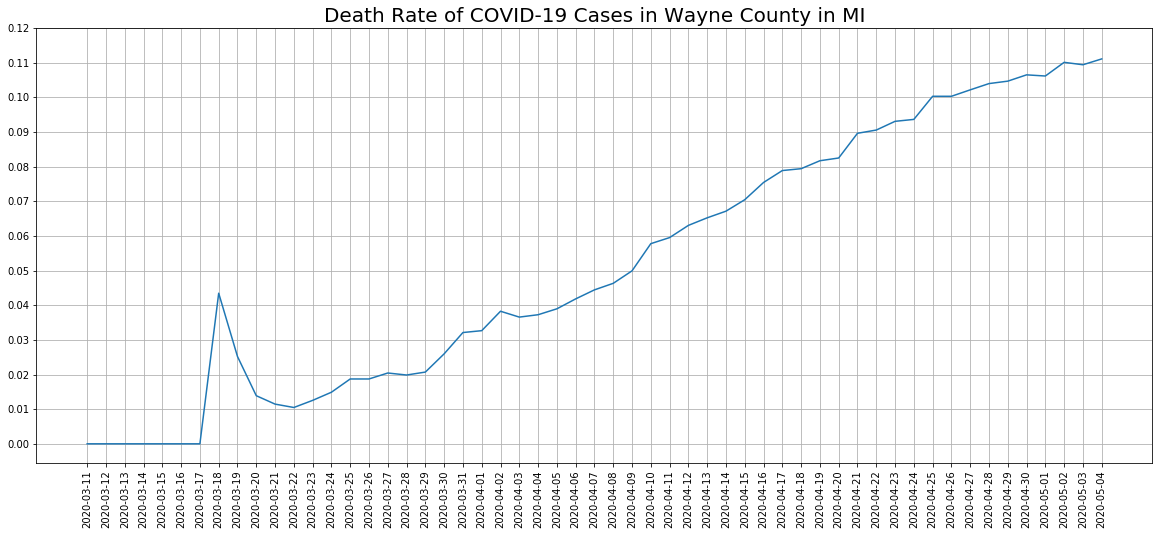

In [118]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne.index, covid_MI_Wayne.death_rate)

ticks_y = np.linspace(0,0.12,13)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [119]:
covid_st_MI_daily = covid_st_MI_summ.diff()
covid_st_MI_daily.columns = ['newcases_daily', 'newdeaths_daily']

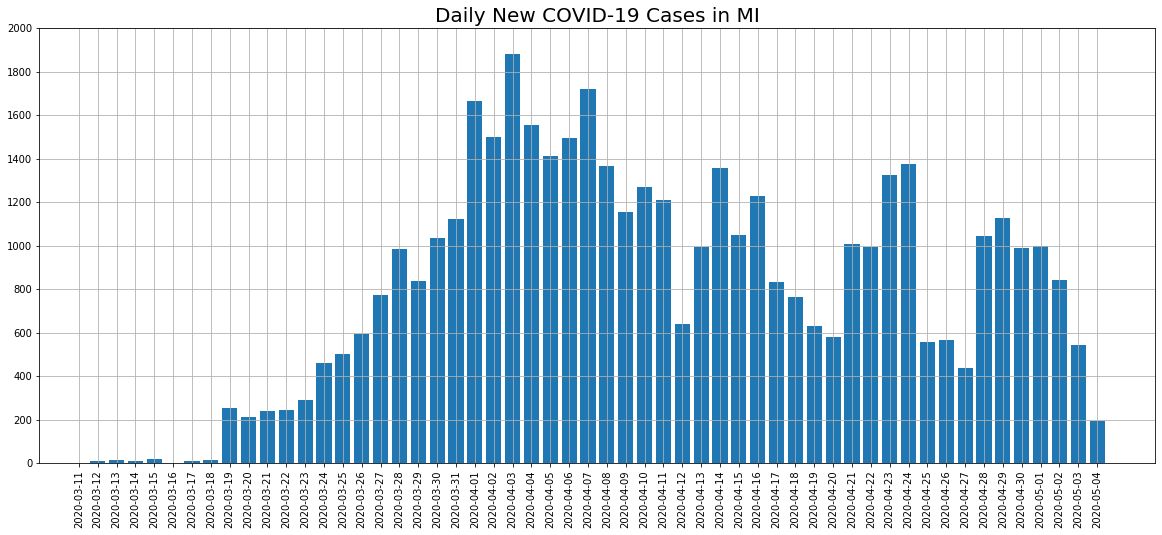

In [121]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in MI', fontsize = '20')
plt.bar(covid_st_MI_daily.index, covid_st_MI_daily.newcases_daily)

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_st_MI_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [122]:
# changed the date range for MI because there was a >300% increase in total # cases on 3/19/2019 (skews y-axis)
covid_st_MI_summ_pct = covid_st_MI_summ[covid_st_MI_summ.index > '2020-03-19'].pct_change()
covid_st_MI_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

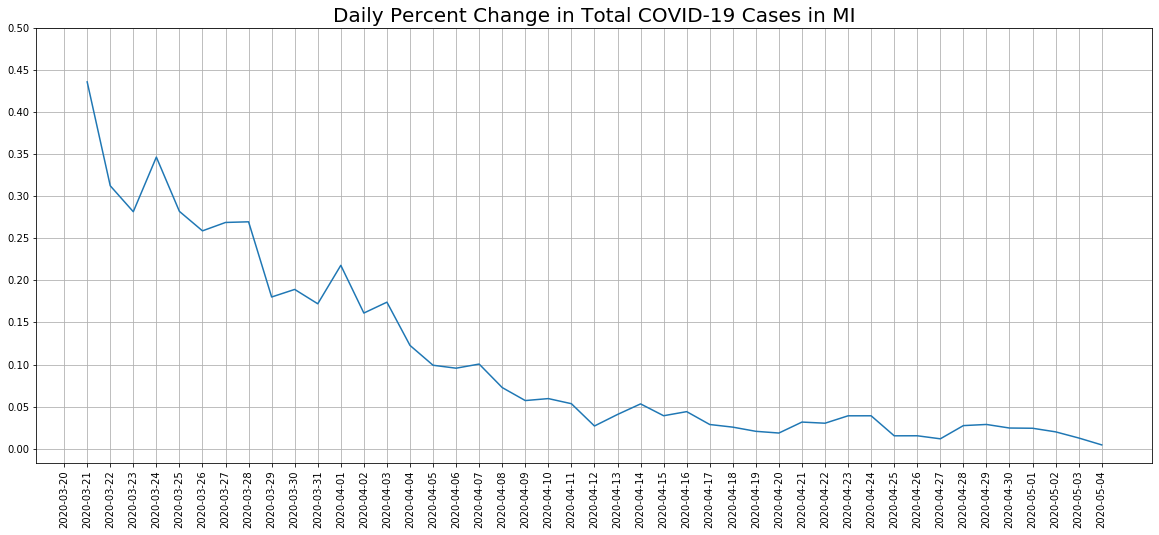

In [123]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in MI', fontsize = '20')
plt.plot(covid_st_MI_summ_pct.index, covid_st_MI_summ_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.50,11)
plt.xticks(covid_st_MI_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

## COVID-19 Data (Latest Data)

In [125]:
covid_data_latest = covid_data[covid_data['date'] == covid_data.date.max()]

In [126]:
covid_data_latest_sum = covid_data_latest.groupby('state')['cases','deaths'].sum()

In [127]:
covid_data_latest_sum = covid_data_latest_sum.sort_values(by='cases', ascending=False)

In [128]:
covid_data_latest_sum['death_rate'] = covid_data_latest_sum['deaths'] / covid_data_latest_sum['cases']

In [129]:
covid_data_latest.loc[:,'CasesPer100000_dup'] = covid_data_latest['CasesPer100000']
covid_data_latest.loc[:,'DeathsPer100000_dup'] = covid_data_latest['DeathsPer100000']
covid_data_latest.loc[:,'2019EstPop_dup'] = covid_data_latest['2019EstPop']

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [130]:
covid_data_latest.loc[:, 'CasesPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, 'DeathsPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, '2019EstPop_dup'] = covid_data_latest.rank(pct=True)

In [131]:
covid_data_latest.rename(columns={'CasesPer100000_dup':'Pctile_CasesPer100000', 'DeathsPer100000_dup':'Pctile_DeathsPer100000', '2019EstPop_dup':'Pctile_2019EstPop'}, inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [132]:
covid_data_latest['Diff_Pct2019Pop_VS_PctCases'] = covid_data_latest['Pctile_2019EstPop'] - covid_data_latest['Pctile_CasesPer100000']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
covid_data_latest['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
covid_data_latest = covid_data_latest[['date', 'county', 'state', 'cases', 'deaths', 'death_rate', 'State_County', '2019EstPop',
'CasesPer100000', 'DeathsPer100000', 'Pctile_CasesPer100000', 'Pctile_DeathsPer100000', 'Pctile_2019EstPop', 
'Diff_Pct2019Pop_VS_PctCases']]

In [135]:
covid_data_latest.describe()

,cases,deaths,death_rate,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
count,2885.000000,2885.000000,2885.000000,2.766000e+03,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2.766000e+03
mean,409.194801,21.910919,inf,1.168100e+05,187.200538,7.409760,0.500181,0.500181,0.500181,-5.345407e-17
std,3770.499936,266.242500,NaN,3.796688e+05,433.020245,18.521768,0.288727,0.272435,0.288727,3.508340e-01
min,0.000000,0.000000,0.000000,4.940000e+02,1.536476,0.000000,0.000362,0.239516,0.000362,-9.446855e-01
25%,6.000000,0.000000,0.000000,1.397725e+04,37.062115,0.000000,0.250271,0.239516,0.250271,-2.270427e-01
50%,25.000000,1.000000,0.010574,3.032450e+04,75.549002,1.074033,0.500181,0.500181,0.500181,2.422270e-02
75%,111.000000,4.000000,0.050459,7.919050e+04,178.884319,6.615616,0.750090,0.750090,0.750090,2.486443e-01
max,175661.000000,13207.000000,inf,1.003911e+07,11946.118398,280.318678,1.000000,1.000000,1.000000,8.727404e-01


In [136]:
covid_data_latest[covid_data_latest['state'] == 'Illinois'].sort_values(by='cases', ascending=False)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
25133,2020-05-04,Cook County,Illinois,43715,1802,0.041222,Illinois_Cook County,5150233.0,848.796550,34.988708,0.965293,0.950832,0.999277,0.033984
26310,2020-05-04,Lake County,Illinois,4252,151,0.035513,Illinois_Lake County,696535.0,610.450300,21.678738,0.943601,0.913232,0.966739,0.023138
25391,2020-05-04,DuPage County,Illinois,3803,196,0.051538,Illinois_DuPage County,922921.0,412.061271,21.236921,0.908894,0.911063,0.980477,0.071584
28004,2020-05-04,Will County,Illinois,3066,169,0.055121,Illinois_Will County,690743.0,443.869862,24.466408,0.916847,0.924078,0.966016,0.049168
26074,2020-05-04,Kane County,Illinois,2115,57,0.026950,Illinois_Kane County,532403.0,397.255462,10.706176,0.901663,0.827187,0.954085,0.052422
26790,2020-05-04,McHenry County,Illinois,790,38,0.048101,Illinois_McHenry County,307774.0,256.681851,12.346722,0.828633,0.850325,0.919017,0.090383
28103,2020-05-04,Winnebago County,Illinois,638,21,0.032915,Illinois_Winnebago County,282572.0,225.783163,7.431734,0.801518,0.770427,0.912509,0.110991
27561,2020-05-04,St. Clair County,Illinois,551,34,0.061706,Illinois_St. Clair County,259686.0,212.179324,13.092735,0.788865,0.856833,0.904917,0.116052
27367,2020-05-04,Rock Island County,Illinois,452,9,0.019912,Illinois_Rock Island County,141879.0,318.581326,6.343433,0.868764,0.741866,0.836587,-0.032176
26122,2020-05-04,Kankakee County,Illinois,383,28,0.073107,Illinois_Kankakee County,109862.0,348.619177,25.486519,0.884671,0.926970,0.804411,-0.080260


In [137]:
covid_data_IL_Cook['death_rate'] = covid_data_IL_Cook['deaths'] / covid_data_IL_Cook['cases']

In [138]:
covid_data_IL_Cook

,cases,deaths,death_rate
date,,,
2020-03-17,107,1,0.009346
2020-03-18,179,1,0.005587
2020-03-19,279,2,0.007168
2020-03-20,412,3,0.007282
2020-03-21,548,4,0.007299
2020-03-22,805,6,0.007453
2020-03-23,922,9,0.009761
2020-03-24,1194,12,0.010050
2020-03-25,1418,13,0.009168


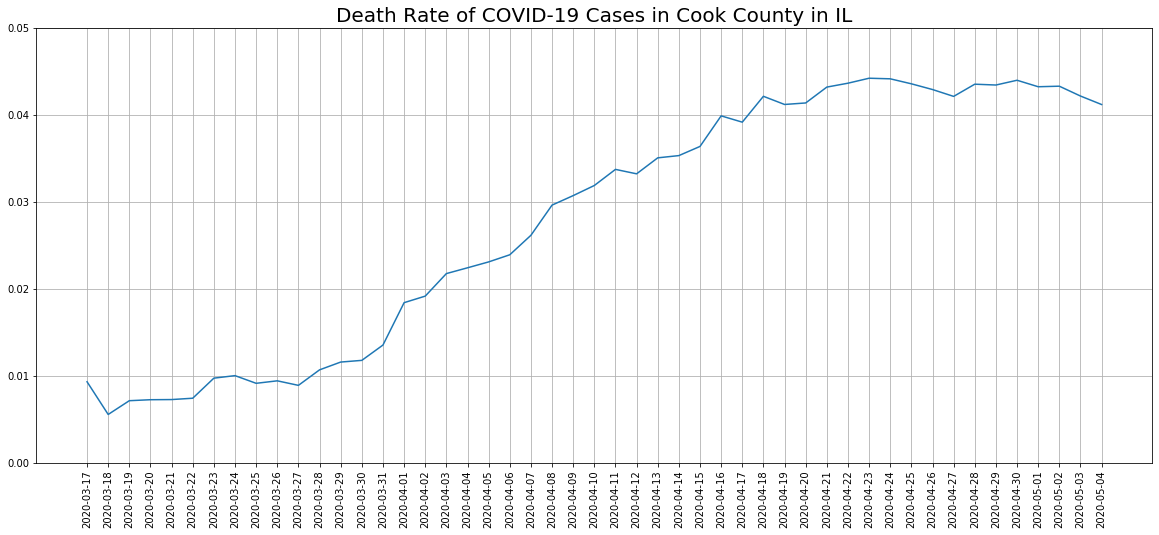

In [139]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook.index, covid_data_IL_Cook.death_rate)

y_ticks = np.linspace(0,0.05,6)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [140]:
covid_data_latest[covid_data_latest['state'] == 'Michigan'].sort_values(by='cases', ascending=False)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
50823,2020-05-04,Wayne County,Michigan,17314,1924,0.111124,Michigan_Wayne County,1749343.0,989.743006,109.984148,0.971800,0.993131,0.993854,0.022054
50012,2020-05-04,Oakland County,Michigan,7499,762,0.101614,Michigan_Oakland County,1257584.0,596.302116,60.592374,0.942516,0.976862,0.989154,0.046638
49479,2020-05-04,Macomb County,Michigan,5736,643,0.112099,Michigan_Macomb County,873972.0,656.313932,73.572151,0.947939,0.983369,0.977585,0.029646
50672,2020-05-04,Unknown County,Michigan,1976,48,0.024291,Michigan_Unknown County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49150,2020-05-04,Kent County,Michigan,1854,39,0.021036,Michigan_Kent County,656955.0,282.211110,5.936480,0.847795,0.729573,0.964570,0.116775
48501,2020-05-04,Genesee County,Michigan,1647,199,0.120826,Michigan_Genesee County,405813.0,405.851956,49.037365,0.906725,0.971077,0.938178,0.031453
50767,2020-05-04,Washtenaw County,Michigan,1118,76,0.067979,Michigan_Washtenaw County,367601.0,304.134102,20.674590,0.861171,0.907809,0.931309,0.070137
50387,2020-05-04,Saginaw County,Michigan,728,68,0.093407,Michigan_Saginaw County,190539.0,382.074011,35.688232,0.895517,0.952639,0.875994,-0.019523
48839,2020-05-04,Ingham County,Michigan,506,13,0.025692,Michigan_Ingham County,292406.0,173.047065,4.445873,0.740781,0.676790,0.915763,0.174982
49054,2020-05-04,Kalamazoo County,Michigan,480,22,0.045833,Michigan_Kalamazoo County,265066.0,181.086975,8.299820,0.753796,0.785611,0.908171,0.154375


In [141]:
whos

Variable                   Type         Data/Info
-------------------------------------------------
FuncFormatter              type         <class 'matplotlib.ticker.FuncFormatter'>
USA_pop_county             DataFrame              State          <...>\n[3194 rows x 4 columns]
cases_day0                 int64        543
county_list1               list         n=20
county_list2               list         n=20
covid_IL_daily             DataFrame                newcases_dail<...>  2341.0             41.0
covid_MI_OAK               DataFrame                cases  deaths<...> 7499     762    0.101614
covid_MI_OAK_cum           DataFrame                cases  deaths<...>               0.006605  
covid_MI_OAK_daily         DataFrame                newcases_dail<...>   -19.0              5.0
covid_MI_OAK_deathrate     DataFrame                cases  deaths<...> 7499     762    0.101614
covid_MI_OAK_pct           DataFrame                cases_dailypc<...>27               0.006605
covid_MI_Way

# <span style="color:green"> CONGRATULATIONS!!! You reached the end of this Jupyter notebook =P